In [2]:
import nease
import pandas as pd

### Input of NEASE

In [6]:
# Diff spliced events in Multiple sclerosis (MS)
table=pd.read_table('AS data/MS/AL_NAWM.deltapsi.tsv')
#table=pd.read_table('AS data/MS/CA_RL.deltapsi.tsv')
#table=pd.read_table('AS data/MS/NAWM_WM.deltapsi.tsv')

table.head(10)

,Gene ID,LSV ID,LSV Type,E(dPSI) per LSV junction,P(|dPSI|>=0.20) per LSV junction,P(|dPSI|<=0.05) per LSV junction,AL E(PSI),NAWM E(PSI),A5SS,A3SS,ES,Num. Junctions,Num. Exons,Junctions coords,IR coords
0,gene:ENSG00000163110,gene:ENSG00000163110:t:94585565-94585737,t|1e1.1o2|1e2.1o1|1e3.1o1|1e4.1o1,-3.968022769580589e-05;-0.038979372333938264;7.771559959221672e-16;0.03465256261123385,4.85496798267649e-21;6.193643798483756e-14;4.842970158886599e-21;1.3507286346406177e-20,0.4750000464385712;0.10275544490943234;0.9999999936099417;0.012185655002943557,0.033;0.913;0.000;0.054,0.019;0.873;0.000;0.108,False,False,True,4,5,94573393-94585565;94576034-94585565;94579369-94585565;94585003-94585565,NaN
1,gene:ENSG00000058673,gene:ENSG00000058673:t:203798846-203802261,t|1e1.2o2|1e2.1o4|1e2.2o4|1e2.3o4|i,0.01833544122051731;0.015647922625228534;7.771559808564548e-16;7.771559808564548e-16;-0.05555024482910702,7.336152918330893e-21;6.7341942996288436e-21;5.104676523669033e-21;5.104676523669033e-21;1.7322348921459987e-09,0.15113014157473942;0.0013393214031412483;0.9999999993385054;0.9999999993385054;7.725488901111355e-05,0.071;0.107;0.014;0.002;0.807,0.100;0.133;0.015;0.006;0.746,True,False,True,4,3,203795794-203801575;203796496-203801575;203796601-203801575;203796607-203801575,203796607-203801575
2,gene:ENSG00000145016,gene:ENSG00000145016:t:197705092-197705175,t|1e1.1o1|1e2.1o1|1e3.1o1,-0.023122456733614155;-0.0017191968612304811;0.010439115946404733,1.1986260452038004e-20;8.808080554387923e-10;1.8576479365438715e-07,0.44997628954072744;0.08301230128180126;0.031089121874604213,0.061;0.275;0.664,0.038;0.270;0.692,False,False,True,3,4,197705175-197749269;197705175-197736655;197705175-197717977,NaN
3,gene:ENSG00000154217,gene:ENSG00000154217:t:67692572-67697261,t|1e1.1o1|1e2.1o1,0.05056711306791081;-0.0505671412965727,1.7573243094549674e-20;2.4308231890039986e-16,0.030410005031662194;0.03041195637355354,0.065;0.935,0.119;0.881,False,False,True,2,3,67675542-67692572;67687184-67692572,NaN
4,gene:ENSG00000196437,gene:ENSG00000196437:t:37411155-37414419,t|1e1.1o1|1e2.1o2,0.10094067732414995;-0.10094071702984464,1.1871881528957876e-06;1.1882186250854222e-06,0.00036840310159484506;0.00036842544731319204,0.036;0.964,0.131;0.869,False,False,True,2,3,37414419-37444907;37414419-37425868,NaN
5,gene:ENSG00000132635,gene:ENSG00000132635:s:2838596-2838746,s|1e1.1o2|1e2.2o2,-7.366853743829686e-13;7.771559959221672e-16,4.8429701588169544e-21;4.842970158886599e-21,0.9089398794010443;0.9999999936099417,0.999;0.001,0.997;0.003,False,False,True,2,3,2838478-2838596;2836110-2838596,NaN
6,gene:ENSG00000197548,gene:ENSG00000197548:t:11308984-11309061,t|1e1.2o2|1e2.3o3|1e3.1o2|1e3.2o2,7.771559959221672e-16;3.173835187128604e-07;7.771559959221672e-16;7.771559959221672e-16,4.842970158886599e-21;4.8430570528431224e-21;4.842970158886599e-21;4.842970158886599e-21,0.9999999936099417;0.47500581336782294;0.9999999936099417;0.9999999936099417,0.007;0.976;0.015;0.002,0.002;0.997;0.000;0.000,True,False,True,4,4,11299416-11308984;11307060-11308984;11308612-11308984;11308861-11308984,NaN
7,gene:ENSG00000172057,gene:ENSG00000172057:t:39924078-39924225,t|1e1.1o1|1e2.1o1|1e3.1o1|2e4.1o1,-0.06253640348163703;-1.2616712432635753e-09;7.771559959221672e-16;0.06905112042696801,0.006081748988264488;4.842970233837995e-21;4.842970158886599e-21;0.008465110608547669,0.0038641339773003436;0.4754469340407786;0.9999999936099417;0.0036408564779540314,0.770;0.006;0.003;0.221,0.689;0.004;0.001;0.307,False,True,True,4,5,39924225-39927484;39924225-39927067;39924225-39924755;39924220-39927484,NaN
8,gene:ENSG00000196562,gene:ENSG00000196562:s:47659697-47659730,s|1e1.1o1|1e2.1o1,5.973800909025373e-13;7.771559959221672e-16,4.842970158828507e-21;4.842970158886599e-21,0.9217980501145803;0.9999999936099417,0.999;0.001,0.999;0.001,False,False,True,2,3,47659452-47659697;47658392-47659697,NaN
9,gene:ENSG00000100568,gene:ENSG00000100568:s:67656412-67656589,s|1e1.1o1|1e2.1o1|2e3.1o1|i,-0.00011796795509699007;0.01

### Run NEASE

In [7]:
# Run nease with standard input.
events=nease.run(table, organism='Human',input_type='MAJIQ')

Processing MAJIQ format...
MAJIQ output converted successfully to NEASE format.

		Data Summary
**************************************************
19 protein domains are affected by AS.
14 of the affected domains have known interactions.
150 protein interactions/binding affected.

**************************************************
Running enrichment analysis...
NEASE enrichment done.


### Classic gene enrichment

In [8]:
# Run on KEGG gene set
events.classic_enrich(gseapy_databases=['Reactome_2016']).head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2016,Muscle contraction Homo sapiens R-HSA-397014,9/196,0.000001,0.000506,0,0,9.483209,128.739408,CAMK2D;TPM2;CACNA2D1;TPM1;ATP2B4;DMD;CACNA1C;ATP2B1;SLC8A1
1,Reactome_2016,Reduction of cytosolic Ca++ levels Homo sapiens R-HSA-418359,3/12,0.000033,0.005953,0,0,62.522013,644.367346,ATP2B4;ATP2B1;SLC8A1
2,Reactome_2016,Activation of NMDA receptor upon glutamate binding and postsynaptic events Homo sapiens R-HSA-442755,4/39,0.000059,0.005953,0,0,21.611973,210.358328,GRIA1;CAMK2D;BRAF;GRIN1
3,Reactome_2016,Cardiac conduction Homo sapiens R-HSA-5576891,6/135,0.000097,0.005953,0,0,8.923911,82.468696,CAMK2D;CACNA2D1;ATP2B4;CACNA1C;ATP2B1;SLC8A1
4,Reactome_2016,Membrane Trafficking Homo sapiens R-HSA-199991,10/420,0.000100,0.005953,0,0,4.799458,44.183420,GRIA1;GOLGA2;C2CD5;TSG101;TFG;KIF3A;AP1B1;DTNBP1;MIA3;BICD1
5,Reactome_2016,"Unblocking of NMDA receptor, glutamate binding and activation Homo sapiens R-HSA-438066",3/17,0.000101,0.005953,0,0,40.182615,369.585221,GRIA1;CAMK2D;GRIN1
6,Reactome_2016,NRAGE signals death through JNK Homo sapiens R-HSA-193648,4/45,0.000105,0.005953,0,0,18.443670,169.025198,ARHGEF11;MCF2L;ARHGEF3;ARHGEF7
7,Reactome_2016,Ion homeostasis Homo sapiens R-HSA-5578775,4/51,0.000171,0.007790,0,0,16.084296,139.488727,CAMK2D;ATP2B4;ATP2B1;SLC8A1
8,Reactome_2016,Signalling by NGF Homo sapiens R-HSA-166520,10/450,0.000176,0.007790,0,0,4.465335,38.599100,ARHGEF11;CAMK2D;MCF2L;AKT3;ARHGEF3;RAPGEF2;BRAF;ARHGEF7;DUSP16;GRIN1
9,Reactome_2016,SALM protein interactions at the synapse Homo sapiens R-HSA-8849932,3/22,0.000225,0.008949,0,0,29.600794,248.647657,GRIA1;DLG3;GRIN1


### NEASE analysis


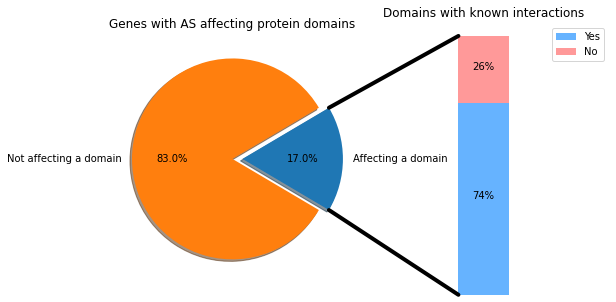

In [9]:
events.get_stats()

In [19]:
len(events.spliced_genes)

109

In [10]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.

events.get_domains()

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Interacting domain,Visualization link
0,GRIA1,2890,ENSG00000155511,ENSE00003466032,PF00060,0.518941,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003466032
1,PDE4DIP,9659,ENSG00000178104,ENSE00003718882,PF07989,0.410351,False,
2,MYH10,4628,ENSG00000133026,ENSE00002227801,PF00063,0.401442,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00002227801
3,ATP2B1,490,ENSG00000070961,ENSE00000909422,PF12424,0.393826,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00000909422
4,ATP2B1,490,ENSG00000070961,ENSE00000909422,PF00689,0.393826,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00000909422
5,BRAF,673,ENSG00000157764,ENSE00003527888,PF07714,0.390281,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003527888
6,SLC25A25,114789,ENSG00000148339,ENSE00003580484,PF13499,0.379921,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003580484
7,DMD,1756,ENSG00000198947,ENSE00003533177,PF00435,0.367859,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003533177
8,LRRFIP2,9209,ENSG00000093167,ENSE00000966409,PF09738,0.363962,False,
9,ALDH3A2,224,ENSG00000072210,ENSE00003768857,PF00171,0.343445,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003768857


In [20]:
# List of affected interactions (domain binding)

events.get_edges()

,Gene name,NCBI gene ID,dPSI,Pfam ID,Number of affected interactions,Affected binding,Affected binding (NCBI)
0,BRAF,673,0.390281,PF07714,31,"LATS2,MRAS,MAPK3,IGF1R,RAB1A,BRAF,IQGAP1,AURKA,PAK2,FGFR2,NRAS,FKBP5,RAP1B,ARAF,AKT1,MAP2K3,PRKCE,LIMK1,EGFR,MAPK1,KRAS,KSR1,RAP1A,MAP2K7,MAP2K1,RAF1,MAP2K2,MAP2K6,RPS6KB2,STK11,HRAS","26524,22808,5595,3480,5861,673,8826,6790,5062,2263,4893,2289,5908,369,207,5606,5581,3984,1956,5594,3845,8844,5906,5609,5604,5894,5605,5608,6199,6794,3265"
1,MAP2K4,6416,0.314945,PF00069,29,"MAP3K3,LRRK2,NPHS1,PLEKHA4,MAPK8,MAP2K4,UBC,MAPK9,GEMIN5,MAP3K5,BLNK,MAP4K2,ITCH,MAP3K10,JUN,AKT1,EGFR,MAP3K8,MAP3K2,MAP3K11,MAPK1,MAP3K7,NBR1,MAPK14,MAP2K7,MAPK10,MAP2K6,MAP3K4,MAP3K1","4215,120892,4868,57664,5599,6416,7316,5601,25929,4217,29760,5871,83737,4294,3725,207,1956,1326,10746,4296,5594,6885,4077,1432,5609,5602,5608,4216,4214"
2,SNRPA1,6627,0.271745,PF14580,28,"TAF15,SNRPE,RBM14,SF3B4,SF3B6,SRSF1,SNRPD3,SNRNP70,SYNCRIP,SNRPF,SNRPG,SRSF7,HTATSF1,SSB,TARDBP,U2AF2,SNRPN,SNRPB2,SFPQ,SNRPB,SNRPD2,SNRPD1,U2AF1,PPIE,SNRPA,LSM2,HNRNPM,LARP7","8148,6635,10432,10262,51574,51639,6634,6625,10492,6636,6637,6432,27336,23435,11338,6638,57819,6629,6421,6628,6633,6632,7307,10450,6626,6426,4670,6741"
3,MYH10,4628,0.401442,PF00063,19,"MYO19,ACTA2,UBASH3B,WDR77,CDK2,EED,IQGAP1,ACTC1,CDK9,PAK2,IKBKE,MYL6,GRK5,MYO1C,CYLD,MYH9,MARK4,USP45,MCC","80179,59,79084,84959,1017,8726,8826,70,1025,5062,9641,4637,2869,4641,1540,4627,57787,85015,4163"
4,GRIA1,2890,0.518941,PF00060,9,"SDCBP,DLG1,GRIK2,GRIA2,PICK1,CACNG2,GRID2,GRIP1,GRIA4","6386,1739,2898,2891,9463,10369,2895,23426,2893"
5,BTN2A1,11120,0.276245,PF07686,9,"PIK3R3,POTEF,SLC25A30,BTN2A2,SLC25A14,CD1B,PDZD8,HLA,TMX4","8503,728378,253512,10385,9016,910,118987,3113,56255"
6,DMD,1756,0.367859,PF00435,8,"PLEKHA4,SNTA1,NEDD4,UTRN,PAK5,SNTB1,MARK2,MAP3K5","57664,6640,7402,4734,57144,6641,2011,4217"
7,GRIN1,2902,0.308774,PF01094,6,"CAMK2G,GRIN3A,GRIN2B,PRKCA,GRIN3B,GRIN2A","818,116443,2904,5578,116444,2903"
8,SYNE1,23345,0.282537,PF00307,4,"NTRK1,SYNE1,MUSK,PPEF1","4914,23345,5475,4593"
9,SLC25A25,114789,0.379921,PF13499,3,"STK38L,SLC25A23,CD79B","23012,79085,974"


### NEASE edge enrichment 

In [12]:
# Run nease enrichment on affected edges
events.enrich(database=['Reactome']).head(35)

NEASE enrichment for the pathway databases:
 ['Reactome']
Found 70 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,R-HSA-112314,Neurotransmitter receptors and postsynaptic signal transmission,Reactome,"GRIA1 (7), ATP2B1 (1), BRAF (4), MAP2K4 (1), GRIN1 (4)",2.128010e-08,0.000009,35.330987
1,R-HSA-5210891,Uptake and function of anthrax toxins,Reactome,"ATP2B1 (1), BRAF (5), MAP2K4 (3)",2.468257e-09,0.000004,34.328820
2,R-HSA-112315,Transmission across Chemical Synapses,Reactome,"GRIA1 (7), ATP2B1 (1), BRAF (4), MAP2K4 (1), GRIN1 (4)",2.207774e-07,0.000037,30.652222
3,R-HSA-5339562,Uptake and actions of bacterial toxins,Reactome,"ATP2B1 (1), BRAF (5), MAP2K4 (3)",2.560786e-08,0.000009,30.276883
4,R-HSA-442755,Activation of NMDA receptor and postsynaptic events,Reactome,"GRIA1 (2), ATP2B1 (1), BRAF (4), MAP2K4 (1), GRIN1 (3)",2.447069e-06,0.000194,25.841239
5,R-HSA-5683057,MAPK family signaling cascades,Reactome,"MYH10 (2), ATP2B1 (1), BRAF (17), MAP2K4 (5), GRIN1 (3)",1.140595e-06,0.000148,23.701314
6,R-HSA-112316,Neuronal System,Reactome,"GRIA1 (7), ATP2B1 (1), BRAF (4), MAP2K4 (1), GRIN1 (4)",2.657946e-06,0.000194,22.235993
7,R-HSA-2871796,FCERI mediated MAPK activation,Reactome,"MYH10 (1), BRAF (7), MAP2K4 (8)",5.455227e-07,0.000082,20.395111
8,R-HSA-5673001,RAF/MAP kinase cascade,Reactome,"MYH10 (1), ATP2B1 (1), BRAF (16), MAP2K4 (4), GRIN1 (3)",7.076613e-07,0.000099,20.027103
9,R-HSA-5684996,MAPK1/MAPK3 signaling,Reactome,"MYH10 (1), ATP2B1 (1), BRAF (16), MAP2K4 (4), GRIN1 (3)",1.736848e-06,0.000194,18.757335


In [13]:
events.enrich(database=['KEGG']).head(35)

NEASE enrichment for the pathway databases:
 ['KEGG']
Found 106 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,path:hsa04912,GnRH signaling pathway - Homo sapiens (human),KEGG,"ATP2B1 (1), BRAF (12), MAP2K4 (14), GRIN1 (2)",3.601984e-14,5.781185e-12,53.615124
1,path:hsa04024,cAMP signaling pathway - Homo sapiens (human),KEGG,"GRIA1 (2), ATP2B1 (2), BRAF (9), MAP2K4 (6), GRIN1 (5), BTN2A1 (1)",1.143820e-10,9.179152e-09,51.186900
2,path:hsa04010,MAPK signaling pathway - Homo sapiens (human),KEGG,"GRIA1 (1), MYH10 (1), BRAF (21), DMD (1), MAP2K4 (20), GRIN1 (1), SYNE1 (1)",2.004862e-16,6.435606e-14,51.117861
3,path:hsa04012,ErbB signaling pathway - Homo sapiens (human),KEGG,"MYH10 (1), BRAF (15), DMD (1), MAP2K4 (9), GRIN1 (2), BTN2A1 (1)",2.219579e-10,1.187475e-08,38.500949
4,path:hsa04014,Ras signaling pathway - Homo sapiens (human),KEGG,"MYH10 (1), ATP2B1 (1), BRAF (17), DMD (1), MAP2K4 (6), GRIN1 (3), SYNE1 (1), BTN2A1 (1)",1.878247e-09,7.536466e-08,34.801970
5,path:hsa04620,Toll-like receptor signaling pathway - Homo sapiens (human),KEGG,"MYH10 (1), BRAF (8), MAP2K4 (12), BTN2A1 (1)",6.230985e-11,6.667154e-09,33.232465
6,path:hsa04015,Rap1 signaling pathway - Homo sapiens (human),KEGG,"ATP2B1 (1), BRAF (18), MAP2K4 (5), GRIN1 (3), BTN2A1 (1)",5.027521e-09,1.467122e-07,33.096614
7,path:hsa04668,TNF signaling pathway - Homo sapiens (human),KEGG,"BRAF (7), DMD (1), MAP2K4 (14), BTN2A1 (1)",2.082729e-10,1.187475e-08,31.525891
8,path:hsa04664,Fc epsilon RI signaling pathway - Homo sapiens (human),KEGG,"BRAF (12), MAP2K4 (9), GRIN1 (1), BTN2A1 (1)",7.357968e-10,3.374154e-08,29.741006
9,path:hsa05033,Nicotine addiction - Homo sapiens (human),KEGG,"GRIA1 (2), GRIN1 (4)",2.859809e-09,9.444512e-08,27.821132


### Pathway specific analysis

In [14]:
events.path_analysis('R-HSA-112314')

Enrichment of the pathway: Neurotransmitter receptors and postsynaptic signal transmission.

Overall p_value:  2.128010371364458e-08




,Spliced genes,NCBI gene ID,Gene knwon to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,GRIA1,2890,True,7/9,6.100691e-11,"DLG1,GRIK2,GRIA2,PICK1,CACNG2,GRIP1,GRIA4","1739,2898,2891,9463,10369,23426,2893"
1,GRIN1,2902,True,4/6,2.789413e-06,"CAMK2G,GRIN2B,PRKCA,GRIN2A","818,2904,5578,2903"
2,BRAF,673,True,4/31,3.853764e-03,"BRAF,MAPK1,RAF1,HRAS","673,5594,5894,3265"
3,ATP2B1,490,False,1/2,4.147310e-02,CALM1,801
4,MAP2K4,6416,False,1/29,4.589620e-01,MAPK1,5594


In [15]:
events.path_analysis('R-HSA-5683057')

Enrichment of the pathway: MAPK family signaling cascades.

Overall p_value:  1.140595379991517e-06




,Spliced genes,NCBI gene ID,Gene knwon to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,BRAF,673,True,17/31,1.624429e-12,"MAPK3,BRAF,IQGAP1,PAK2,FGFR2,NRAS,RAP1B,ARAF,EGFR,MAPK1,KRAS,KSR1,RAP1A,MAP2K1,RAF1,MAP2K2,HRAS","5595,673,8826,5062,2263,4893,5908,369,1956,5594,3845,8844,5906,5604,5894,5605,3265"
1,GRIN1,2902,True,3/6,5.473954e-03,"CAMK2G,GRIN2B,GRIN2A","818,2904,2903"
2,MAP2K4,6416,False,5/29,4.491556e-02,"UBC,JUN,EGFR,MAP3K11,MAPK1","7316,3725,1956,4296,5594"
3,ATP2B1,490,False,1/2,1.321844e-01,CALM1,801
4,MYH10,4628,False,2/19,3.769828e-01,"IQGAP1,PAK2","8826,5062"


### Visualization

In [21]:
events.Vis_path("R-HSA-5674135",file='AS data/enrichment/',k=0.8)

Enrichment of the pathway: MAP2K and MAPK activation.

Overall p_value:  8.915927938237625e-08


Visualization of the pathway generated in: AS data/enrichment/MAP2K and MAPK activation.html


In [22]:
events.Vis_path("R-HSA-112314",k=0.8)

Enrichment of the pathway: Neurotransmitter receptors and postsynaptic signal transmission.

Overall p_value:  2.128010371364458e-08


Visualization of the pathway generated in: Neurotransmitter receptors and postsynaptic signal transmission.html
